# Kikeh Phase 3 help code
## 1. Place manifolds and decide optimal number of lines

In [246]:
fileName = "Kikeh planned wells (tmp).xlsx"
df = pd.read_excel(fileName, sheet_name="structures")
df.columns = list(df.iloc[3, :])
df = df.iloc[4:, ]
df["x"] = df["4 Position (x,y,z) (m)"].str.split(pat=",").str[0]
df["y"] = df["4 Position (x,y,z) (m)"].str.split(pat=",").str[1]
df["z"] = df["4 Position (x,y,z) (m)"].str.split(pat=",").str[2]
# df.astype({"x":float,"y":'float',"z":'float'})
df[["x", "y", "z"]] = df[["x", "y", "z"]].apply(pd.to_numeric)
df.fillna("", inplace=True)
df.head()
# qgrid_widget = qgrid.show_grid(df, show_toolbar=True)
# qgrid_widget

,Property Label,ParentId,Name,AssetName,Template Name,1 Description,2 Nom OD (in),"2 Size (X,Y,Z) (m)",2 Weight,"4 Position (x,y,z) (m)",...,Connection Point,Component Id,Note,Area,System,Field Net Reserve (BCF),Status,x,y,z
4,23,,fb5-120,xmas,OC-xmas,"1 flow, 1 control, 6in OD",6,"1.184,1.598,1.938",100,"-2456.03,-3802.98,-1474.5887",...,"[\n {\n ""type"": ""Connector"",\n ""positio...","1622,1623,1624,1625",,Kikeh gas,Gas,,Planned,-2456.03,-3802.98,-1474.5887
5,24,,fb5-136,xmas,OC-xmas,"1 flow, 1 control, 6in OD",6,"1.184,1.598,1.938",100,"-1183.03,-5566.78,-1401.6305",...,"[\n {\n ""type"": ""Connector"",\n ""positio...","1622,1623,1624,1625",,Kikeh gas,Gas,,Planned,-1183.03,-5566.78,-1401.6305
6,25,,fb5-150,xmas,OC-xmas,"1 flow, 1 control, 6in OD",6,"1.184,1.598,1.938",100,"-1488.03,-4227.98,-1442.5248",...,"[\n {\n ""type"": ""Connector"",\n ""positio...","1622,1623,1624,1625",,Kikeh gas,Gas,,Planned,-1488.03,-4227.98,-1442.5248
7,26,,k north-120,xmas,OC-xmas,"1 flow, 1 control, 6in OD",6,"1.184,1.598,1.938",100,"-1433.03,-165.98,-1500.9111",...,"[\n {\n ""type"": ""Connector"",\n ""positio...","1622,1623,1624,1625",,Kikeh North,Oil,,Planned,-1433.03,-165.98,-1500.9111
8,27,,k north-150,xmas,OC-xmas,"1 flow, 1 control, 6in OD",6,"1.184,1.598,1.938",100,"-1032.03,-173.98,-1500.5386",...,"[\n {\n ""type"": ""Connector"",\n ""positio...","1622,1623,1624,1625",,Kikeh North,Oil,,Planned,-1032.03,-173.98,-1500.5386


In [248]:
df[df["System"]=="Gas"]

,Property Label,ParentId,Name,AssetName,Template Name,1 Description,2 Nom OD (in),"2 Size (X,Y,Z) (m)",2 Weight,"4 Position (x,y,z) (m)",...,Connection Point,Component Id,Note,Area,System,Field Net Reserve (BCF),Status,x,y,z
4,23,,fb5-120,xmas,OC-xmas,"1 flow, 1 control, 6in OD",6,"1.184,1.598,1.938",100,"-2456.03,-3802.98,-1474.5887",...,"[\n {\n ""type"": ""Connector"",\n ""positio...","1622,1623,1624,1625",,Kikeh gas,Gas,,Planned,-2456.03,-3802.98,-1474.5887
5,24,,fb5-136,xmas,OC-xmas,"1 flow, 1 control, 6in OD",6,"1.184,1.598,1.938",100,"-1183.03,-5566.78,-1401.6305",...,"[\n {\n ""type"": ""Connector"",\n ""positio...","1622,1623,1624,1625",,Kikeh gas,Gas,,Planned,-1183.03,-5566.78,-1401.6305
6,25,,fb5-150,xmas,OC-xmas,"1 flow, 1 control, 6in OD",6,"1.184,1.598,1.938",100,"-1488.03,-4227.98,-1442.5248",...,"[\n {\n ""type"": ""Connector"",\n ""positio...","1622,1623,1624,1625",,Kikeh gas,Gas,,Planned,-1488.03,-4227.98,-1442.5248
14,33,,pm-03,manifold,OC-manifold,"1 flow, 1 control, 6in OD",6,"5.235,3.6,5.012",100,"-1655.91,-3139.75,-1478.8044",...,"[\n {\n ""type"": ""Connector"",\n ""positio...",,Gather all Gas,Kikeh gas,Gas,,Planned,-1655.91,-3139.75,-1478.8044
16,35,,ps25,xmas,OC-xmas,"1 flow, 1 control, 6in OD",6,"1.184,1.598,1.938",100,"-785.03,-2706.98,-1473.5082",...,"[\n {\n ""type"": ""Connector"",\n ""positio...","1622,1623,1624,1625",,Kikeh gas,Gas,,Planned,-785.03,-2706.98,-1473.5082
17,36,,px-09 bhl,xmas,OC-xmas,"1 flow, 1 control, 6in OD",6,"1.184,1.598,1.938",100,"-829.63,-3004.28,-1471.9469",...,"[\n {\n ""type"": ""Connector"",\n ""positio...","1622,1623,1624,1625",,Kikeh gas,Gas,,Planned,-829.63,-3004.28,-1471.9469
18,37,,px-12,xmas,OC-xmas,"1 flow, 1 control, 6in OD",6,"1.184,1.598,1.938",100,"-1197.03,-3081.98,-1474.8545",...,"[\n {\n ""type"": ""Connector"",\n ""positio...","1622,1623,1624,1625",,Kikeh gas,Gas,,Planned,-1197.03,-3081.98,-1474.8545
19,38,,px10,xmas,OC-xmas,"1 flow, 1 control, 6in OD",6,"1.184,1.598,1.938",100,"-1398.03,-3204.98,-1471.5887",...,"[\n {\n ""type"": ""Connector"",\n ""positio...","1622,1623,1624,1625",,Kikeh gas,Gas,,Planned,-1398.03,-3204.98,-1471.5887
20,39,,px11,xmas,OC-xmas,"1 flow, 1 control, 6in OD",6,"1.184,1.598,1.938",100,"-1044.03,-3118.98,-1469.5128",...,"[\n {\n ""type"": ""Connector"",\n ""positio...","1622,1623,1624,1625",,Kikeh gas,Gas,,Planned,-1044.03,-3118.98,-1469.5128
25,44,,Manifold Gas 4h 1free EP,manifold,OC-manifold,"1 flow, 1 control, 6in OD",6,"5.235,3.6,5.012",100,"-1185.17,-3505.9,0.0",...,"[\n {\n ""type"": ""Connector"",\n ""positio...",,Gas EP,Kikeh gas,Gas,,Future,-1185.17,-3505.90,0.0000


## Place up to 3 manifolds to the optimal position taking into account of all wells and end point. 
Connection is then done so the wells are connected to the closest manifold and then manifolds are connected to the end point.
Manifolds positions are in red while end point is in green. 

[[-2456.03, -3802.98], [-1183.03, -5566.78], [-1488.03, -4227.98], [-785.03, -2706.98], [-829.63, -3004.28], [-1197.03, -3081.98], [-1398.03, -3204.98], [-1044.03, -3118.98]] [-1655.91, -3139.75]
Gas system connecting 8 wells to specified manifold at location [[-1655.91, -3139.75]] is best done by 3 lines of 4714m length
Specified manifold at location [[-1655.91, -3139.75]] and tie-in point [[-1185.17, -3505.9]] is connected by 1 lines of 596m length (BLACK)
	 Total length for this case is 5310m

Connecting path for Gas is [['pm-03', 'fb5-120'], ['pm-03', 'px10'], ['px10', 'px-12'], ['px-12', 'px11'], ['px11', 'px-09 bhl'], ['px-09 bhl', 'ps25'], ['pm-03', 'fb5-150'], ['fb5-150', 'fb5-136'], ['Manifold Gas 4h 1free EP', 'pm-03']]


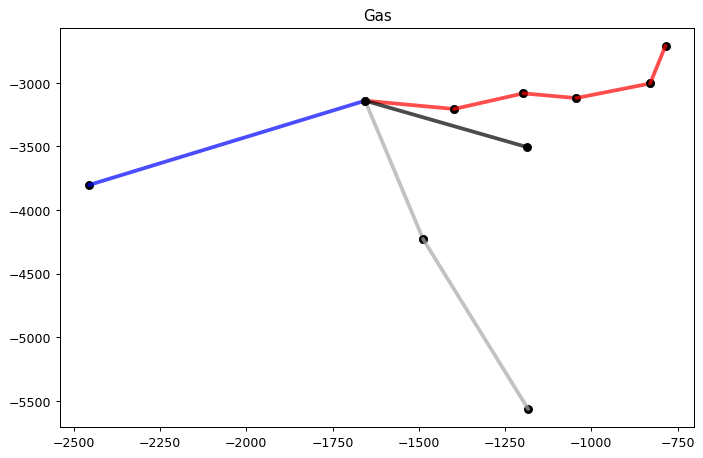

[[-1433.03, -165.98], [-1032.03, -173.98], [-1742.03, -1011.98], [-1590.03, -1127.98]] [-1676.04, -836.14]
Oil system connecting 4 wells to specified manifold at location [[-1676.04, -836.14]] is best done by 2 lines of 1491m length
Specified manifold at location [[-1676.04, -836.14]] and tie-in point [[-1824.63, -4041.31]] is connected by 1 lines of 3208m length (BLACK)
	 Total length for this case is 4699m

Connecting path for Oil is [['pm-04', 'kecil-120'], ['kecil-120', 'kecil-136'], ['pm-04', 'k north-120'], ['k north-120', 'k north-150'], ['PM-02 Oil 6h loop 1free EP', 'pm-04']]


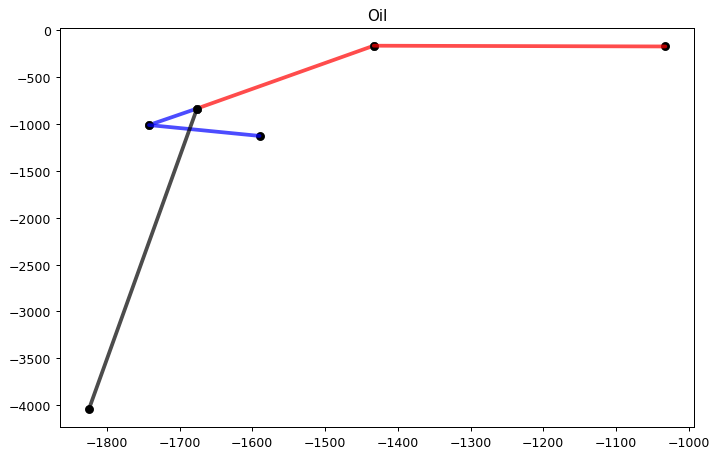

[[377.96997000000005, -83.98], [-714.03, -716.98], [987.37, -3337.28]] [1209.7899, -338.1]
Water system connecting 3 wells to specified manifold at location [[1209.7899, -338.1]] is best done by 2 lines of 5138m length
Specified manifold at location [[1209.7899, -338.1]] and tie-in point [[-104.26003, 935.42]] is connected by 1 lines of 1829m length (BLACK)
	 Total length for this case is 6967m

Connecting path for Water is [['wm-04', 'k north-inj'], ['k north-inj', 'kecil-inj'], ['wm-04', 'wb-06 bhl'], ['s-rbp-su1', 'wm-04']]


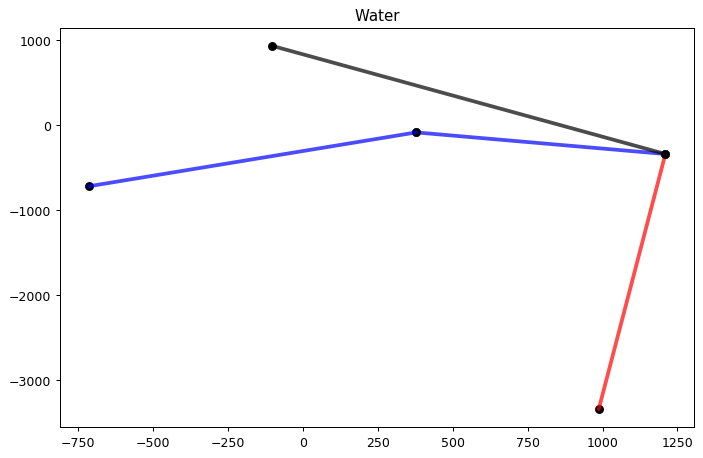

In [249]:
for s in df.System.unique():
    systemLines=[]
    distAccu = 0
    wells_df = (df[(df.System == s)
                   & (df["Template Name"] == "OC-xmas")][["x", "y"]])
    man_df = df[(df.System == s)
               & (df['Note'].str.contains(pat='Gather'))][["x", "y"]]
    ep_df = df[(df.System == s)
               & (df['Note'].str.contains(pat='EP'))][["x", "y"]]
    #     print(ep_df)
    if len(wells_df) > 1:
        
        # Could be used to detrmine the optimal Manifold Location
#         print(f"\n\tTesting {s} system with {len(wells_df)} wells and end point at {ep_df.values}")
#         m_l = testManifoldLocations(np.array(wells_df).tolist(), np.array(ep_df).tolist(), s)

# Connect wells with the specified manifold
        print(np.array(wells_df).tolist(),np.array(man_df).tolist()[0])
        conLines, dist, noOfLines = getOptimalPath(np.array(wells_df).tolist(),np.array(man_df).tolist()[0],len(wells_df))
        path=[]
        systemLines.append(conLines)
#         print(len(conLines))
        for line in conLines:
            p1=df[(df["x"]==line[0].xy[0][0])&(df["y"]==line[0].xy[1][0])]["Name"].values[0]
            p2=df[(df["x"]==line[0].xy[0][1])&(df["y"]==line[0].xy[1][1])]["Name"].values[0]
            path.append([p1,p2])
        distAccu += dist
        print(f"{s} system connecting {len(wells_df)} wells to specified manifold at location {np.array(man_df).tolist()} is best done by {noOfLines} lines of {dist}m length")
        conLines, dist, noOfLines = getOptimalPath(np.array(man_df).tolist(),np.array(ep_df).tolist()[0],1)
        conLines[0][1]="BLACK"
        for line in conLines:
            p1=df[(df["x"]==line[0].xy[0][0])&(df["y"]==line[0].xy[1][0])]["Name"].values[0]
            p2=df[(df["x"]==line[0].xy[0][1])&(df["y"]==line[0].xy[1][1])]["Name"].values[0]
            path.append([p1,p2])
        systemLines.append(conLines)
        print(f"Specified manifold at location {np.array(man_df).tolist()} and tie-in point {np.array(ep_df).tolist()} is connected by {noOfLines} lines of {dist}m length (BLACK)")
        distAccu += dist
        print(f"\t Total length for this case is {distAccu}m\n")
        print(f"Connecting path for {s} is {path}")
        systemLines = [item for sublist in systemLines for item in sublist]
        TMPPLOT(systemLines,s)


# Functions

In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import sklearn.neighbors
from shapely.geometry import Point, Polygon, LineString
from shapely.figures import SIZE, set_limits, plot_coords, plot_bounds, plot_line, plot_line_issimple
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp
import math
from matplotlib import pyplot
import qgrid

In [227]:
def getOptimalPath(points_2dList, ep_2dList, maxLinesToEp):
#     print(f"cp in {points_2dList}\n ep in{ep_2dList}\n")
    #     points_2dList = points_2dList.tolist()
    col_l = ["BLUE", "RED", "DARKGRAY", "GREEN"]
    points_2dList.insert(0, ep_2dList)
#     print(f"inserted EP at position 0 {points_2dList}")
    maxLength = 500000
    _cases = []
    #     print(f"\nChecking case with {len(points_2dList)} wells and {(ep_2dList)} end points")
    min = maxLength
    if len(points_2dList)<2:
        raise NameError('Less than 2 points trying to connect')
    for i in range(maxLinesToEp, 0, -1):
        paths, total_distance = getPath(points_2dList, i, maxLength)
        if total_distance <= min:
            min = total_distance
            minPath = paths
            noOfLines = i


#         print(f"Solution with {i} lines has distance of {total_distance}m ")
#     print(f"Selected solution is with {noOfLines} lines and {min}m distance")
    _l = []
    for k in range(noOfLines):
        col = col_l[k]
        for j, p in enumerate(minPath[k]["path"][:-1]):
            _line = connect(minPath[k]["path"][j], minPath[k]["path"][j + 1])
            _l.append([_line,col])
    return _l, min, noOfLines


def TMPPLOT(lines,title=""):
    SIZE = (20, 20)
    col_l = ["BLUE", "RED", "DARKGRAY", "GREEN"]
    fig = pyplot.figure(1, figsize=SIZE, dpi=90)
    ax = fig.add_subplot(321)
    ax.set_title(title)
    for _line, col in lines:
#         print(col)
        plot_coords(ax, _line)
        plot_bounds(ax, _line)
        plot_line(ax, _line, alpha=0.7, color=col)
    plt.show()

In [164]:

def plot_m_l(m_l,s, manNum):
    df2=pd.DataFrame(m_l)
    SIZE = (10, 10)
    fig = pyplot.figure(1, figsize=SIZE, dpi=90)
    ax = fig.add_subplot(321)
    # mask=(df2["system"=="water"]) & (df2["noOfManifolds"==2])
    # for i in range(df2[mask]["lines"].count()):
    _df= df2[(df2["system"]==s) & (df2["noOfManifolds"]==manNum) &(df2["distance"]!=0)]
#     lines = df2[(df2["system"]==s) & (df2["noOfManifolds"]==manNum) &(df2["distance"]!=0)]["lines"]
    for index, x in _df.iterrows():
    #     print(x)
        for i in x["lines"]:
            line = i
    #         print(line)
            plot_coords(ax, line)
            if x["connecting"]=="EP, CP-Manifolds":
                plot_bounds(ax, line)
            plot_line_issimple(ax, line, alpha=0.7)

            ax.set_title(s)

    pyplot.show()
# df2.plot("lines")

In [141]:
def testManifoldLocations(wells, ep,system=""):
    #     wellsWithEp=np.vstack((wells, ep))
    maxNum = len(wells) - 1
    if maxNum > 3:
        maxNum = 3
    items_df = pd.DataFrame()
    m_l = []
    #     if maxNum%3==0: col = 3
    #     else: col = 2
    #     row= round(maxNum/col)
    #     row=1
    col = maxNum
    #     fig, ax = plt.subplots(nrows=row, ncols=col)
    #     SIZE = (15,5)
    #     fig.set_size_inches(SIZE)
    i = 0
    #     print(ax)
    #     for col in ax:
    for i in range(maxNum):
        i += 1
        print(f"Checking solution with {i} manifolds")
        kmeans = KMeans(n_clusters=i,
                        init='k-means++',
                        max_iter=300,
                        n_init=10,
                        random_state=0)
        pred_y = kmeans.fit_predict(wells)
        pred_y=pred_y.tolist()
        m_ix = kmeans.fit_predict(wells)
        m_ix = m_ix.tolist()
        m_loc = kmeans.cluster_centers_
        m_loc= m_loc.tolist()
#         print(f"m_loc is {m_loc[0]} and ep is{ep[0]}")
        #         print([m_loc[j] for j in m_ix])
        #         print(len([wells[x] for x, value in enumerate(m_ix) if value==0]))
        #         m_l.append({"noOfManifolds": i, "locations:":m_loc})
        distAccu = 0
        for man in range(i):
            thisManifoldWells = [
                wells[x] for x, value in enumerate(m_ix) if value == man
            ]
            thisManifold = m_loc[man]
            #             print(f"Manifold {man+1} with {len(thisManifoldWells)} wells at {(thisManifoldWells)}\n and manifold at {thisManifold}")
            conLines, dist, noOfLines = getOptimalPath(thisManifoldWells,
                                                       thisManifold,len(thisManifoldWells))
            #             print(f"Manifold {man+1} at location {thisManifold} has optimal line length of {dist}m using {noOfLines} lines")
            m_l.append({
                "system":system,
                "noOfManifolds": i,
                "locations:": m_loc,
                "case with number of manifolds": man,
                "connecting":"EP-Manifold, CP-Wells",
                "EP_loc": thisManifold,
                "CP_loc": thisManifoldWells,
                "lines": conLines,
                "distance": dist,
                "numberOfConnectingLines": noOfLines
            })
            distAccu += dist
        conLines, dist, noOfLines = getOptimalPath(m_loc,ep[0],1)
        m_l.append({
            "system":system,
            "noOfManifolds": i,
            "locations:": m_loc,
            "case with number of manifolds": man,
            "connecting":"EP, CP-Manifolds",
            "EP_loc": ep,
            "CP_loc": m_loc,
            "lines": conLines,
            "distance": dist,
            "numberOfConnectingLines": noOfLines
        })
        distAccu += dist
        print(f"{i} Manifolds solution has line length of {distAccu}m")
        plot_m_l(m_l,system,i)


#         _items_df=connectSystem(wells, m_loc, m_ix, ep)
#         _items_df.plot("positions")
#         items_df = items_df.append(_items_df,ignore_index=True, sort=False)
#         col.scatter(wells[:,0], wells[:,1])
#         col.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
#         col.scatter(ep[:,0], ep[:,1],s=200, c='green')
#         col.set_xlabel(f'{i} manifolds {m_loc}', labelpad = 5)
#     plt.show()
#     print(items_df)
    
    return m_l

In [17]:
def connectSystem(w_loc, m_loc=[], m_ix=[], ep_loc=[float(0), float(0)]):
    '''
    Connects all wells to the nearest manifold or end point. Then connectes all manifolds and end point. 
    Returns a dataframe with lines and lengths and manifolds and number of connections to every manifold. 
    
    :param w_loc: list of well locations [[x1,y1,z1],...[xn,yn,zn]]
    :param m_loc: numpy array of position of manifolds
    :paramm_ix: numpy array of index showing cluster number for every well
    :paramep_loc: location of end point
    '''
    l = []
    _d = {"Element": [], "qty": [], "positions": [], "case": []}

    # treat clusters and end point as connecting nodes, in order to find best connections
    eps = m_loc  #THE ONLY DIFFERENCE MERGE - HOLD
    #     eps = np.vstack([eps, ep_loc]) #if commented that means that exclude EP for the wells connections

    # find nearest cluster to connect wells to
    tree = sklearn.neighbors.KDTree(eps)
    # this connects all wells with the nearest cluster point
    # needs a verification if the nearest is also the one chosen by the cluster HOLD
    for w in w_loc:
        d, i = tree.query([w])
        new_origin = tree.get_arrays()[0][i[0][0]]
        distance = d[0][0]
        l.append(connect(w, new_origin))

    # now we need to connect all cluster points by excluding the current cp from the possible connections
    eps = np.vstack([eps, ep_loc])  # here we include EP for the connections
    for kk, ep in enumerate(eps):
        #         print("eps",eps, eps.shape)
        #         print("ep",ep, ep.shape)

        if eps.shape[0] == 1:
            continue

        eps_m = np.delete(eps, kk, 0)
        tree = sklearn.neighbors.KDTree(eps_m)
        d, i = tree.query([ep])
        new_origin = tree.get_arrays()[0][i[0][0]]
        distance = d[0][0]
        #         print(f"From node {ep} closest node is {new_origin} with distance {distance}")
        #         print(f"Nodes list to choose closest is {eps_m}")
        l.append(connect(ep, new_origin))

    # put data in dataframe
    for item in l:
        _d["Element"] = _d["Element"] + ["l"]
        _d["qty"] = _d["qty"] + [item.length]
        _d["positions"] = _d["positions"] + [item]
        _d["case"] = _d["case"] + ["m=" + str(len(m_loc))]
    for m in m_loc:
        _d["Element"] = _d["Element"] + ["m"]
        count = 0
        for item in l:
            if (m == item.coords[0]).all() or (m == item.coords[-1]).all():
                count += 1


#                 print(f"M {m} connects line from {item.coords[0]} to {item.coords[-1]}")
#         print(f" case {str(len(m_loc))} m {m} has {count} connections")
        _d["qty"] = _d["qty"] + [count]
        _d["positions"] = _d["positions"] + [m]
        _d["case"] = _d["case"] + ["m=" + str(len(m_loc))]
    df = pd.DataFrame(_d)

    return df


def connect(point1, point2):
    '''
    takes 2 points and returns line object
    '''
    firstPoint = point1
    lastPoint = point2
    #     findPath HOLD
    path = [firstPoint, lastPoint]
    l = LineString(path)
    return l

In [225]:
'''
Plotting code
'''

COLOR = {True: '#6699cc', False: '#ffcc33'}


def v_color(ob):
    return COLOR[ob.is_simple]


def plot_coords(ax, ob):
    x, y = ob.xy
    ax.plot(x, y, 'o', color='#999999', zorder=1)


def plot_bounds(ax, ob):
    #     print(ob.boundary)
    x, y = zip(*list((p.x, p.y) for p in ob.boundary))
    ax.plot(x, y, 'o', color='#000000', zorder=1)


# def plot_line(ax, ob):
#     x, y = ob.xy
#     ax.plot(x,
#             y,
#             color=v_color(ob),
#             alpha=0.7,
#             linewidth=3,
#             solid_capstyle='round',
#             zorder=2)


def plot_df(items_df):
    SIZE = (10, 10)
    fig = pyplot.figure(1, figsize=SIZE, dpi=90)

    for case_ix, case in enumerate(items_df["case"].unique()):
        case_m = items_df["case"] == case
        l_m = items_df["Element"] == "l"
        mask = case_m & l_m
        ax = fig.add_subplot(321 + case_ix)

        for i in range(items_df[mask]["Element"].count()):
            line = items_df[mask]["positions"].values[i]
            #             print(line)
            plot_coords(ax, line)
            plot_bounds(ax, line)
            plot_line_issimple(ax, line, alpha=0.7)

        ax.set_title(case)

    pyplot.show()

In [74]:
def print_solution(data, manager, routing, solution):
    """Prints solution on console."""

    path = []
    max_route_distance = 0
    sum_route_distance = 0
    for vehicle_id in range(data['num_lines']):
        _path = {}
        index = routing.Start(vehicle_id)
        plan_output = 'Route for line {}:\n'.format(vehicle_id)
        _path["line"] = vehicle_id
        route_distance = 0
        _pathL = []
        while not routing.IsEnd(index):
            plan_output += ' {} -> '.format(manager.IndexToNode(index))
            _pathL.append(data["locations"][manager.IndexToNode(index)])
            previous_index = index
            index = solution.Value(routing.NextVar(index))
            route_distance += routing.GetArcCostForVehicle(
                previous_index, index, vehicle_id)
        _path["path"] = _pathL
        _path["distance"] = route_distance
        path.append(_path)
        plan_output += '{}\n'.format(manager.IndexToNode(index))
        plan_output += 'Distance of the route: {}m\n'.format(route_distance)
        #         print(plan_output)
        max_route_distance = max(route_distance, max_route_distance)
        sum_route_distance += route_distance
#     print('Maximum of the route distances: {}m'.format(max_route_distance))
#     print('Sum of the route distances: {}m'.format(sum_route_distance))
    return path, sum_route_distance


# [START distance_callback]
def compute_euclidean_distance_matrix(locations):
#     print(f"Locations input for distance calc are: {locations}")
    """Creates callback to return distance between points."""
    distances = {}
#     locations=locations.tolist()
#     print(f"Locations as list for distance calc are: {locations}")
    for from_counter, from_node in enumerate(locations):
        distances[from_counter] = {}
        for to_counter, to_node in enumerate(locations):
            if from_counter == to_counter or to_counter == 0:
                distances[from_counter][to_counter] = 0
            else:
                # Euclidean distance
                distances[from_counter][to_counter] = (int(
                    math.hypot((from_node[0] - to_node[0]),
                               (from_node[1] - to_node[1]))))
    return distances


    # [END distance_callback]
def create_data_model(points_2dList, noOfLines):
    """Stores the data for the problem."""
    data = {}

    data['locations'] = points_2dList
    data['num_lines'] = noOfLines
    data['depot'] = 0
    #     print(data)
    return data


def getPath(points_2dList, noOfLines, maxLength=200000):
    #     print(points_2dList)
    """Solve the CVRP problem."""
    # Instantiate the data problem.
    data = create_data_model(points_2dList, noOfLines)

    # Create the routing index manager.
    #     manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
    #                                            data['num_vehicles'], data['depot'])
    manager = pywrapcp.RoutingIndexManager(len(data['locations']),
                                           data['num_lines'], data['depot'])

    # Create Routing Model.
    routing = pywrapcp.RoutingModel(manager)
    distance_matrix = compute_euclidean_distance_matrix(data['locations'])

    # Create and register a transit callback.
    def distance_callback(from_index, to_index):
        """Returns the distance between the two nodes."""
        # Convert from routing variable Index to distance matrix NodeIndex.
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return distance_matrix[from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)
    # Define cost of each arc.
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Add Distance constraint.
    dimension_name = 'Distance'
    routing.AddDimension(
        transit_callback_index,
        0,  # no slack
        maxLength,  # line maximum distance
        True,  # start cumul to zero
        dimension_name)
    distance_dimension = routing.GetDimensionOrDie(dimension_name)
    distance_dimension.SetGlobalSpanCostCoefficient(100)

    # Setting first solution heuristic.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

    # Solve the problem.
    solution = routing.SolveWithParameters(search_parameters)
    #     print(solution)
    # Print solution on console.
    if solution:
        path, total_distance = print_solution(data, manager, routing, solution)

    else:
        print("No solution found!")
    return path, total_distance

### Import Seabed and triangulation code